In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [13]:
#read data from disk

data = pd.read_csv('sp500.csv', index_col='Date', parse_dates=True)

print(data.head())

             SP500
Date              
2009-06-23  895.10
2009-06-24  900.94
2009-06-25  920.26
2009-06-26  918.90
2009-06-29  927.23


In [67]:
data['SMA50'] = data['SP500'].rolling(50).mean()

data['SMA100'] = data['SP500'].rolling(100).mean()

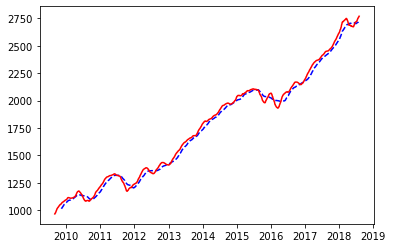

In [69]:
fig = plt.figure()

ax1 = plt.subplot()

ax1.plot( data['SMA100'], '--b' )
ax1.plot( data['SMA50'], 'r' )

In [81]:

# 100% allocation when SMA50 > SMA100
data['Position'] = np.where( data['SMA50'] > data['SMA100'], 1, 0 )
data['Position'] = data['Position'].shift()

#daily percentage gain
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']

#cumulative returns

data['Strategy'] = ( data['StrategyPct'] + 1).cumprod()

#buy & hold returns
data[ 'BuyHold' ] = ( data['SP500'].pct_change(1) + 1 ).cumprod()

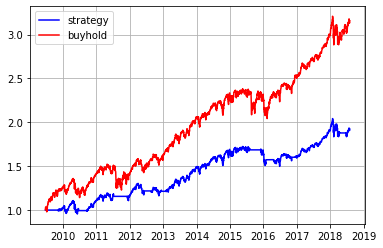

In [98]:
fig2 = plt.figure()

ax2 = plt.subplot()

ax2.plot( data['Strategy'], 'b', label='strategy' )
ax2.plot( data['BuyHold'], 'r', label='buyhold' )

ax2.grid()

ax2.legend()
